In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Collecting The Data

In [87]:
df=pd.read_csv("mcdonalds.csv")
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,4,41,Every three months,Male


Exploring the Data

In [88]:
df.shape
df.dtypes
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   int64 
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(2), object(13)
memory usage: 170.4+ KB


yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [89]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [90]:
df.shape

(1453, 15)

In [148]:
df.mean()

yummy              0.552650
convenient         0.907777
spicy              0.093599
fattening          0.867171
greasy             0.526497
fast               0.900206
cheap              0.598761
tasty              0.644184
expensive          0.357880
healthy            0.198899
disgusting         0.242946
Like               5.777013
Age               44.604955
VisitFrequency     2.637990
Gender             0.457674
cluster_num        1.774260
dtype: float64

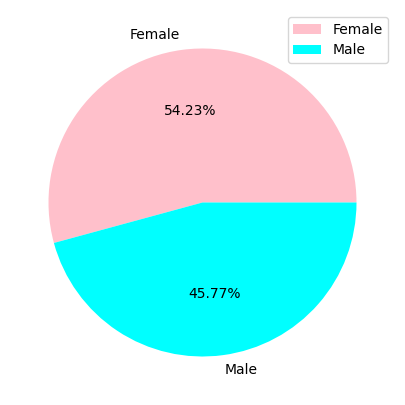

In [150]:
Gender = ["Female", "Male"]
Color = ["pink", "cyan"]
Size = df["Gender"].value_counts()
plt.pie(Size, labels=Gender, colors=Color, autopct="%.2f%%")
plt.legend()
plt.show()

<ipython-input-152-02c474e3dedf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  f = sns.countplot(x=df["Age"], palette='hsv')


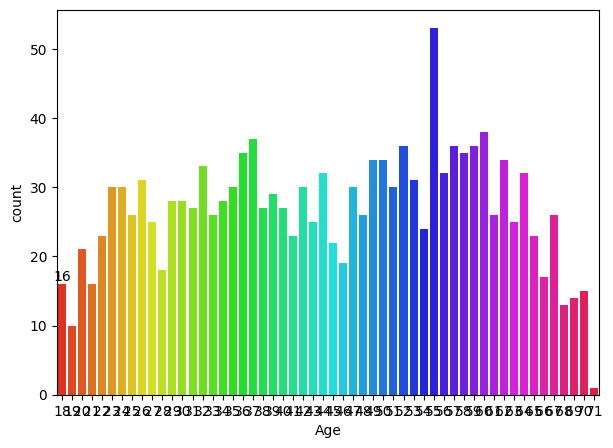

In [152]:
f = sns.countplot(x=df["Age"], palette='hsv')
f.bar_label(f.containers[0])
plt.rcParams['figure.figsize'] = (25, 8)

In [91]:
col=df.columns
col=col[:11]
bf=df
for i in col:
  bf[i]=bf[i].map({'Yes':1,'No':0})
bf

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,Every three months,Male


Label encoding the orginal data set

In [92]:
#Label encoding for categorical - Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
df


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,Every three months,Male


In [93]:
bf=bf.iloc[:,:11]

In [94]:
bf.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
bf.corr()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
yummy,1.000000,0.253807,0.008742,-0.087027,-0.151853,0.106836,0.105036,0.687280,-0.061727,0.247183,-0.419852
convenient,0.253807,1.000000,0.028928,0.036451,-0.106948,0.243062,0.151574,0.289755,-0.163961,0.099230,-0.340797
spicy,0.008742,0.028928,1.000000,-0.041322,0.053932,0.020276,0.017203,0.061154,0.045979,0.106252,0.032834
fattening,-0.087027,0.036451,-0.041322,1.000000,0.319283,0.045600,-0.026640,-0.087561,0.089134,-0.338401,0.146054
greasy,-0.151853,-0.106948,0.053932,0.319283,1.000000,-0.058212,-0.073264,-0.163536,0.147283,-0.211186,0.321879
fast,0.106836,0.243062,0.020276,0.045600,-0.058212,1.000000,0.252133,0.145836,-0.201694,0.033596,-0.137993
cheap,0.105036,0.151574,0.017203,-0.026640,-0.073264,0.252133,1.000000,0.139485,-0.721593,0.130003,-0.125602
tasty,0.687280,0.289755,0.061154,-0.087561,-0.163536,0.145836,0.139485,1.000000,-0.104884,0.226271,-0.437086
expensive,-0.061727,-0.163961,0.045979,0.089134,0.147283,-0.201694,-0.721593,-0.104884,1.000000,-0.069873,0.199748
healthy,0.247183,0.099230,0.106252,-0.338401,-0.211186,0.033596,0.130003,0.226271,-0.069873,1.000000,-0.173722


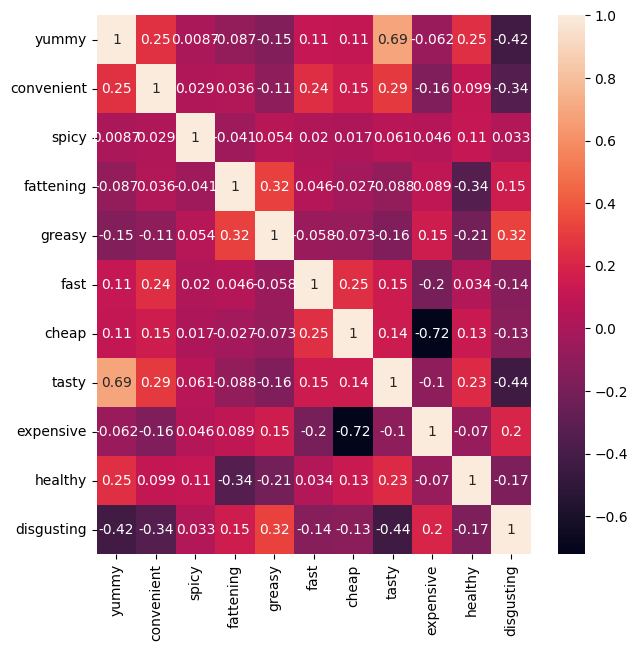

In [96]:
plt.figure(figsize=(7,7))
sns.heatmap(bf.corr(), annot=True)
plt.show()

In [97]:
df.query('Gender == "Male"').Gender.count()

665

In [98]:
df.query('Gender == "Female"').Gender.count()

788

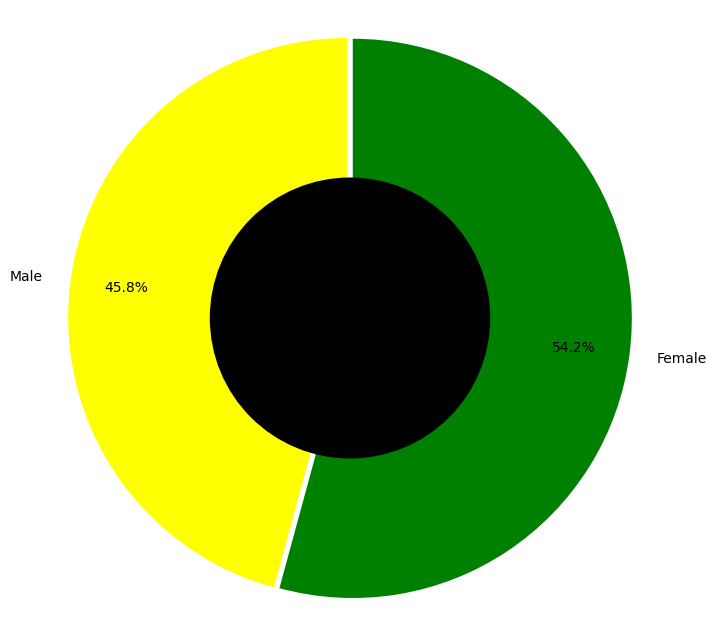

In [99]:
labels = ['Male','Female']
sizes = [df.query('Gender == "Male"').Gender.count(),df.query('Gender == "Female"').Gender.count()]
#colors
colors = ['yellow','green']
#explsion
explode = (0.01,0.01)
plt.figure(figsize=(8,8))
my_circle=plt.Circle( (0,0), 0.5, color='black')
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.80,explode=explode)
p=plt.gcf()
plt.axis('equal')
p.gca().add_artist(my_circle)
plt.show()


Perfroming ELBOW Method to find out the most suitable value for k

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [101]:
X=bf
mapping1 = {}
K = range(1, 10)
t=[]

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    t.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)))
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [102]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 1.3566210503435796
2 : 1.1815545534885887
3 : 1.071330135305748
4 : 1.002270973789519
5 : 0.930597044982425
6 : 0.9018804333378264
7 : 0.8769471486925823
8 : 0.8118160463076478
9 : 0.7936378612328493


Plotting the histogram based on the sum within the cluster distances

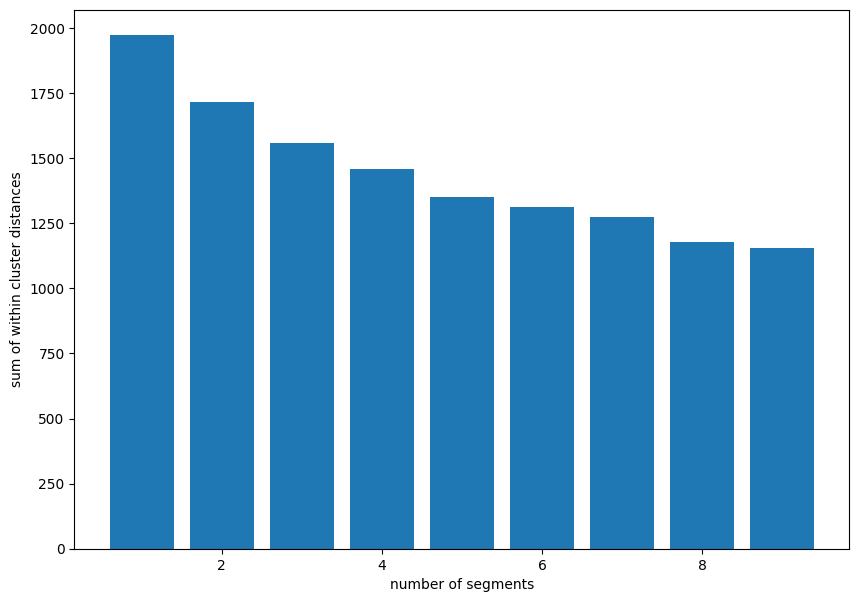

In [103]:
fig = plt.figure(figsize =(10, 7))
plt.xlabel("number of segments")
plt.ylabel("sum of within cluster distances")
# Horizontal Bar Plot
plt.bar(K, t)

# Show Plot
plt.show()

Through the above graph we can say that the the sharp edge of the elbow is at no. of segment = 5, Thus further we will use k=5

Reducing the dimension using PCA so that we can easily visualize it

In [104]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca_data = preprocessing.scale(X)

pca = PCA(n_components=11)
pc = pca.fit_transform(X)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [105]:
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [106]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [107]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = bf.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


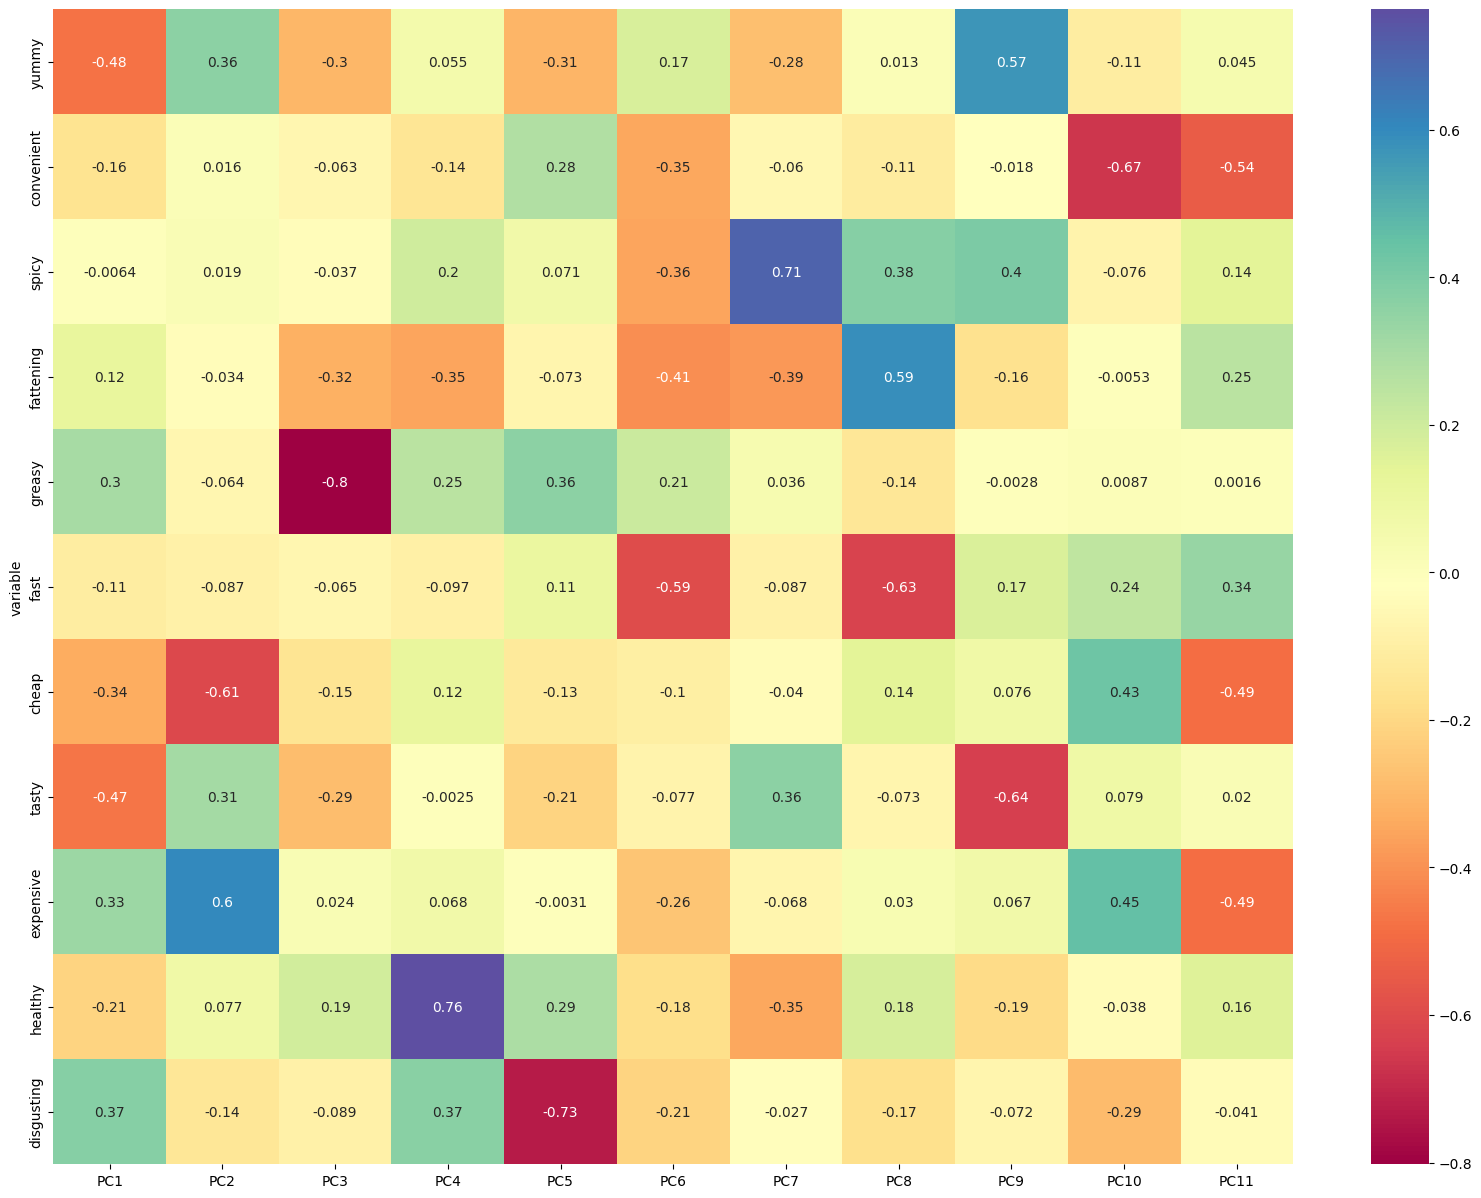

In [108]:
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

Extracting the Segments

Performing K- means Clustering and visualising it over pca results as x and y label

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


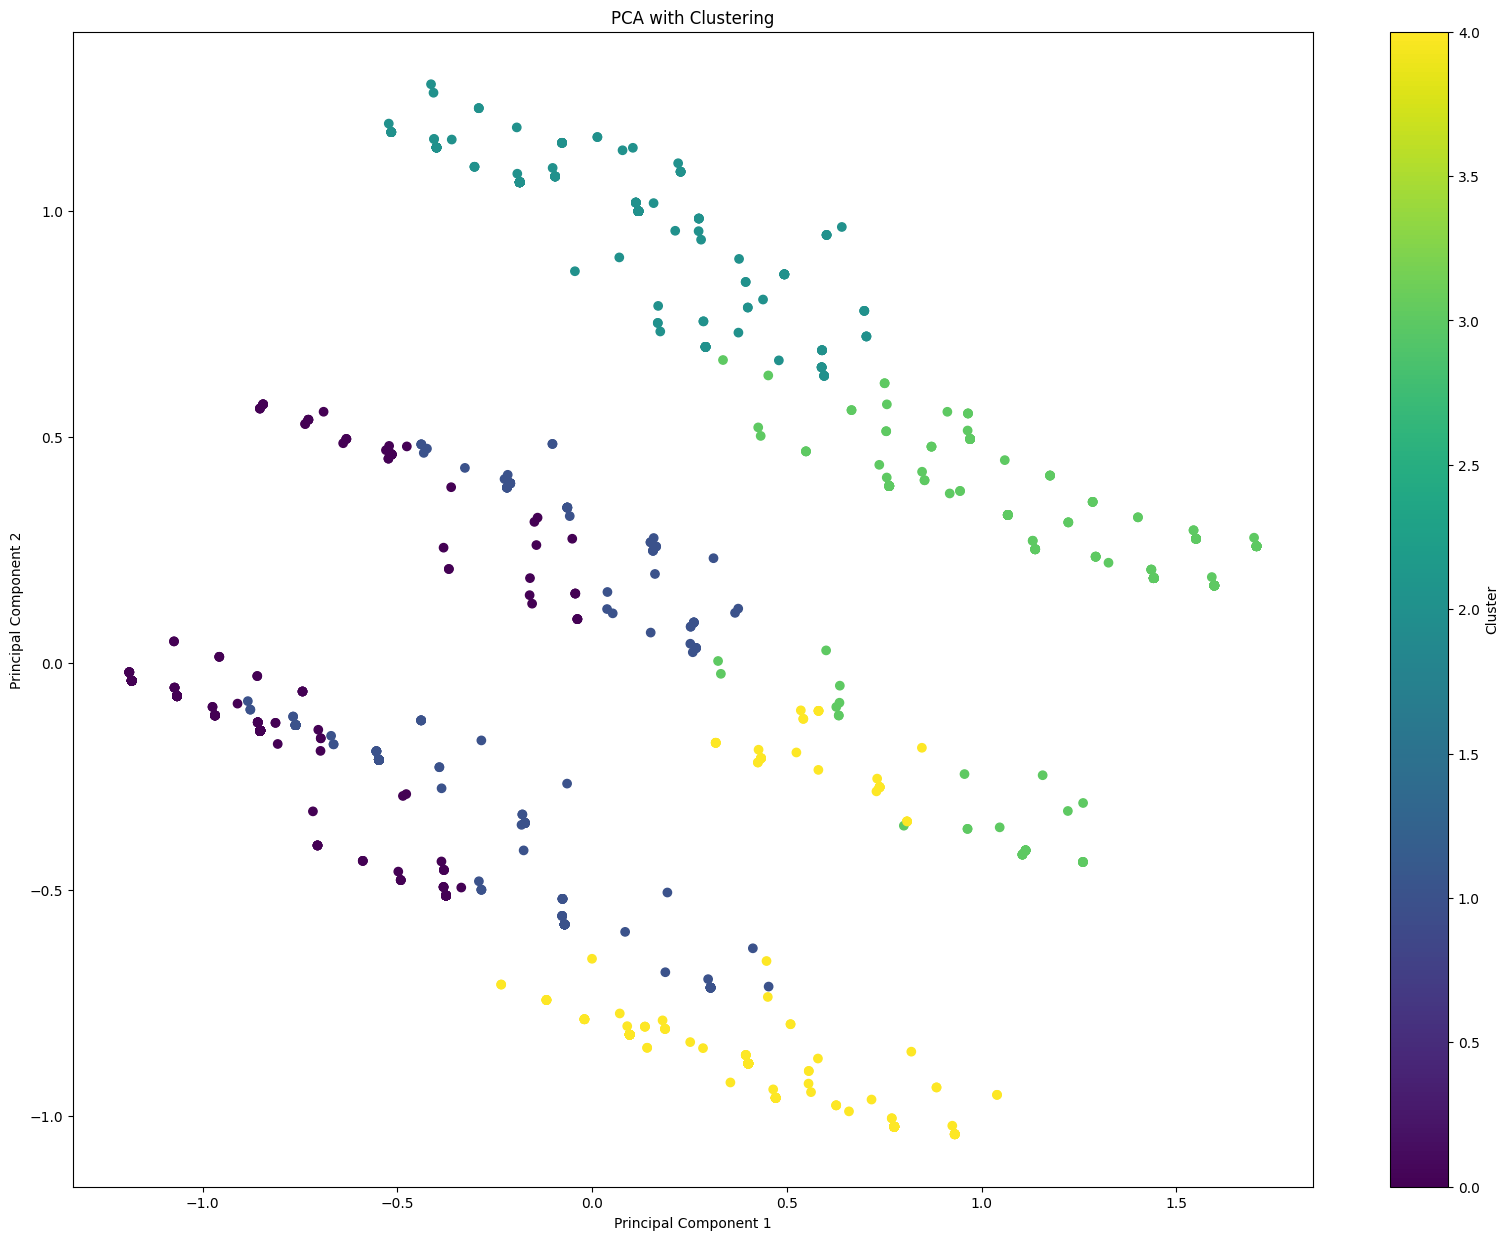

PCA Projection Axes:
[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.21087805]
 [-0.28051863 -0.05973793  0.70763705 -0.38594277  0.03616962 -0.08684577
  -0.04044934  0.36045348 -0.06838452 -0.34961569 -0.02679159]
 [ 0.01304117 -0.1130

In [109]:
# Perform clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(bf)

# Plot the PCA results with different colors for each cluster
plt.scatter(pc[:, 0], pc[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA with Clustering')
plt.colorbar(label='Cluster')
plt.show()

# Display projection axes (principal components)
print("PCA Projection Axes:")
print(pca.components_)

Performing Hierarchial Clustering

In [110]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

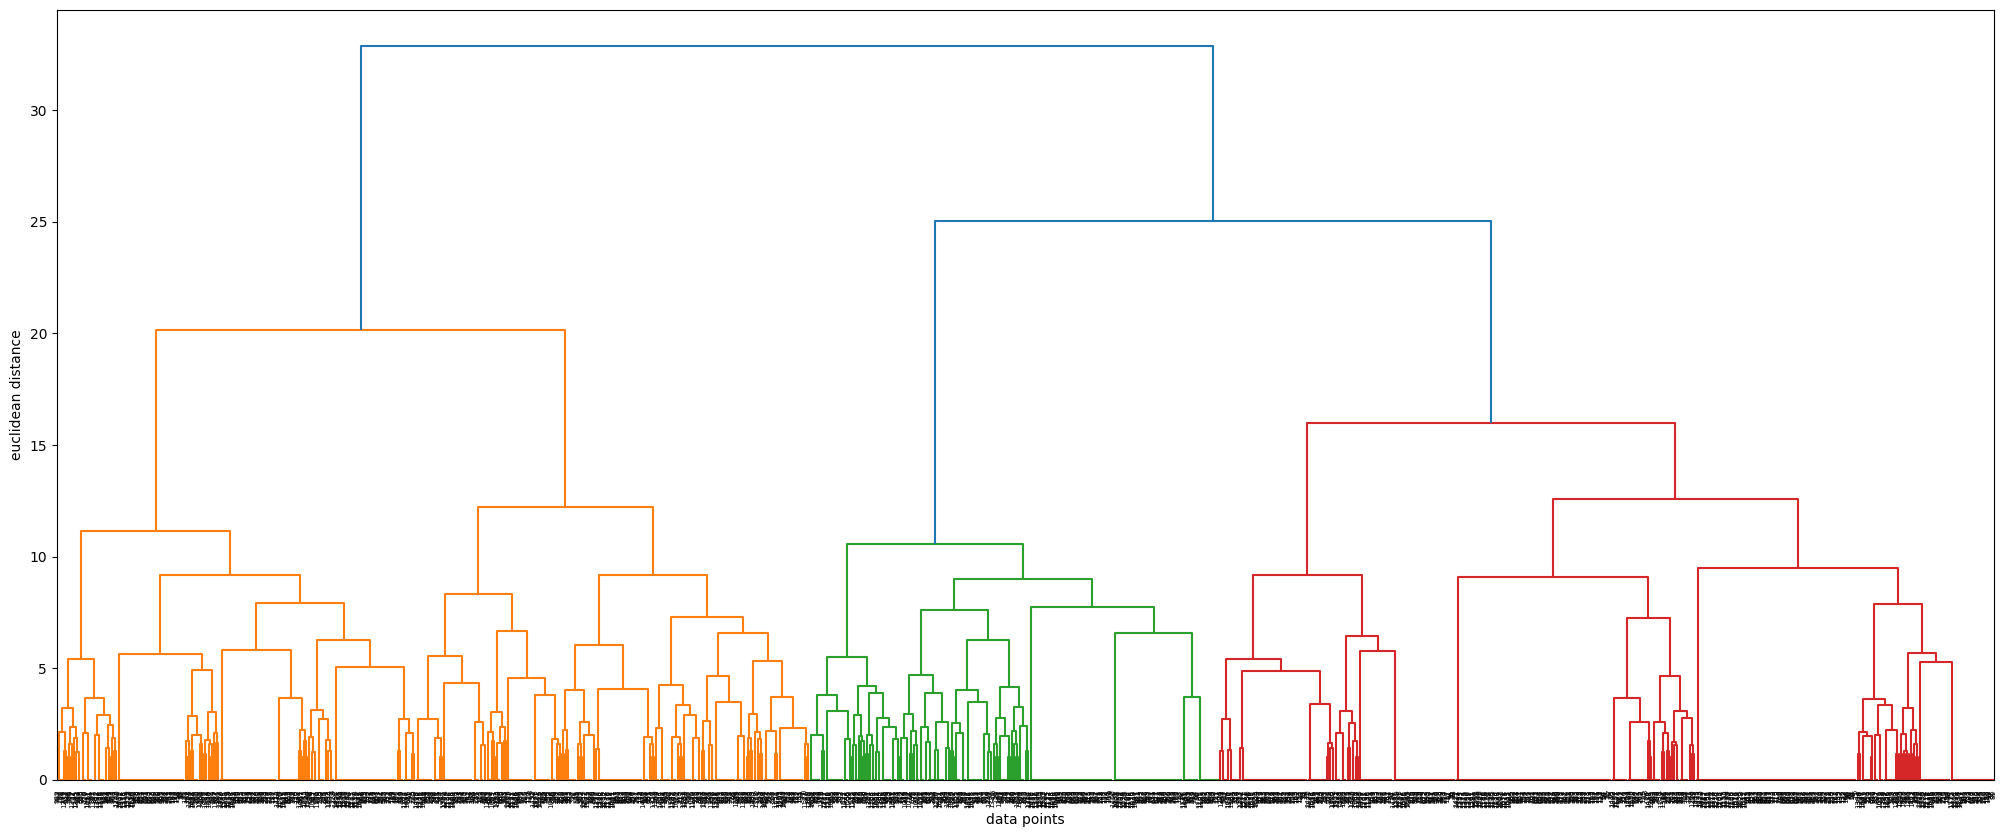

In [111]:
merg = linkage(bf,method="ward")
plt.figure(figsize=(25,10))
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


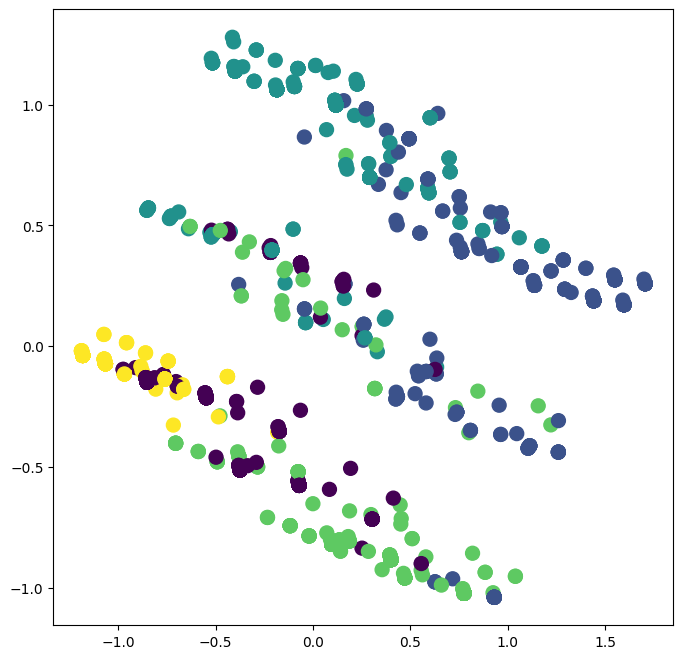

In [112]:
#create model
hiyerartical_cluster = AgglomerativeClustering(n_clusters = 5,affinity= "euclidean",linkage = "ward")
data_predict = hiyerartical_cluster.fit_predict(bf)
plt.figure(figsize=(8,8))
plt.scatter( pc[:, 0], pc[:, 1] , c = data_predict , s = 100 )
plt.show()

Now working over the LIKE, VisitFrequency Columns

<ipython-input-113-b238cfe058eb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="Like", y="Age",data=df,


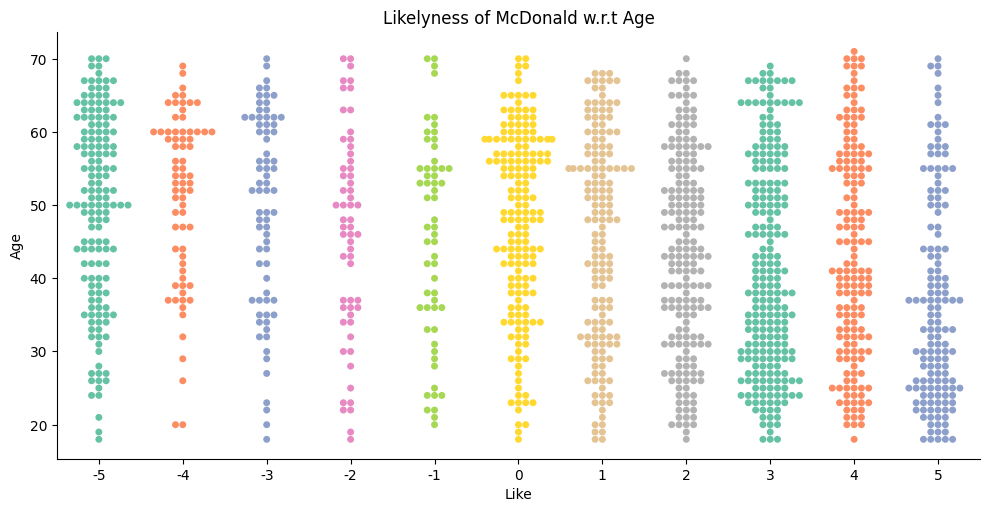

In [113]:
#Customer segmentation - based on pyschographic segmentation

#For convinence renaming the category
df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
#Like
sns.catplot(x="Like", y="Age",data=df,
            orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age')
plt.show()

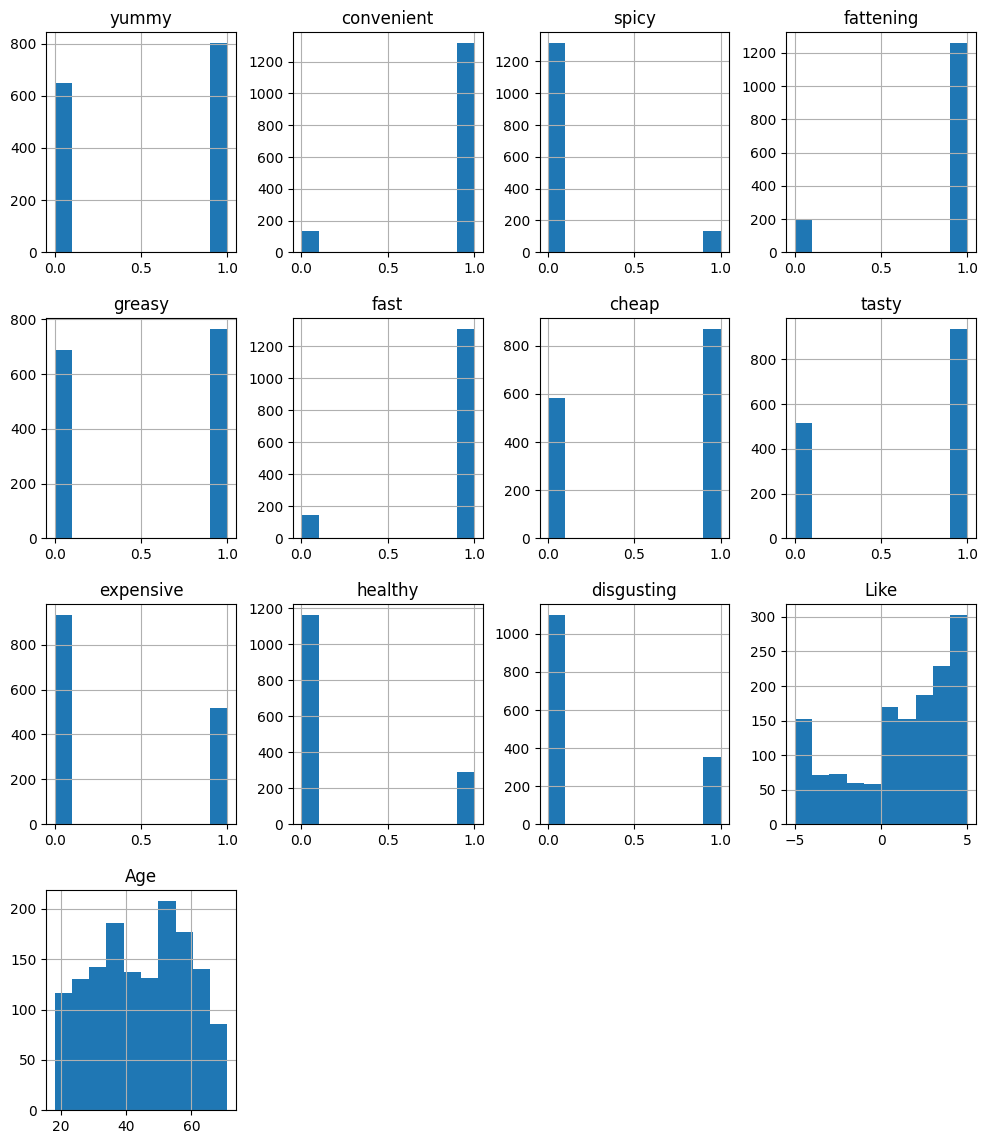

In [114]:
#Histogram of the each attributes
plt.rcParams['figure.figsize'] = (12,14)
df.hist()
plt.show()

In [115]:
pip install bioinfokit

In [116]:
import bioinfokit as bio

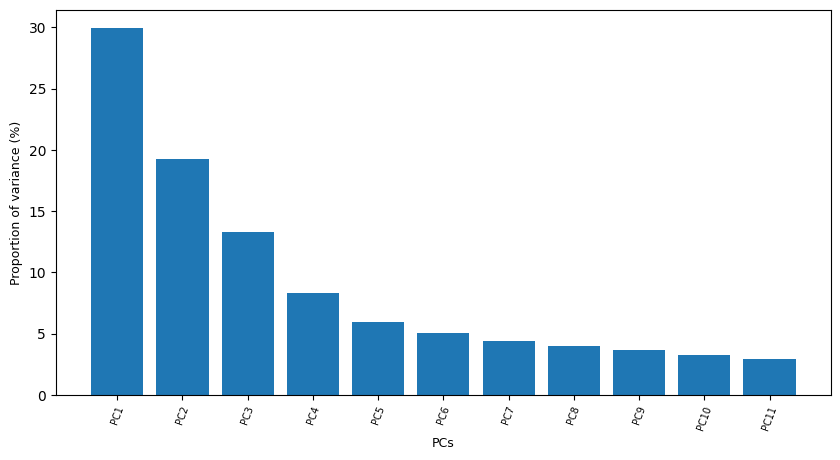

In [117]:
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))

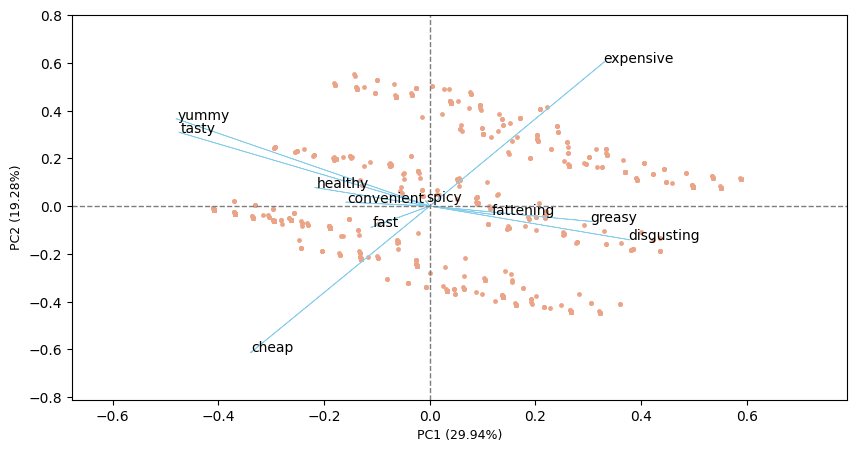

In [118]:
pca_scores = PCA().fit_transform(X)
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

In [119]:
df['cluster_num'] = kmeans.labels_#adding to df

In [120]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,4
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,Female,1
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,Female,2
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,Female,1
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,Male,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male,3
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,Once a week,Female,0
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,Once a month,Female,2
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,Every three months,Male,0


In [139]:
#DESCRIBING SEGMENTS

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(df['cluster_num'],df['Like'])
# Reordering cols - get existing column names and reorder
existing_cols = crosstab.columns.tolist()
desired_order = ['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']
# Keep only those columns that exist in the DataFrame
ordered_cols = [col for col in desired_order if col in existing_cols]
crosstab = crosstab[ordered_cols]
crosstab

Like
cluster_num
0
1
2
3
4


In [144]:
#DESCRIBING SEGMENTS

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(df['cluster_num'],df['Like'])
crosstab

Like,0,1,2,3,4,5,6,7,8,9,10
cluster_num,,,,,,,,,,,
0,2,3,2,2,5,32,47,55,103,72,68
1,4,5,6,9,16,32,43,54,49,48,43
2,4,3,5,5,4,27,31,47,57,39,32
3,85,27,30,17,13,35,13,7,8,0,0
4,57,33,30,26,20,43,18,24,12,1,0


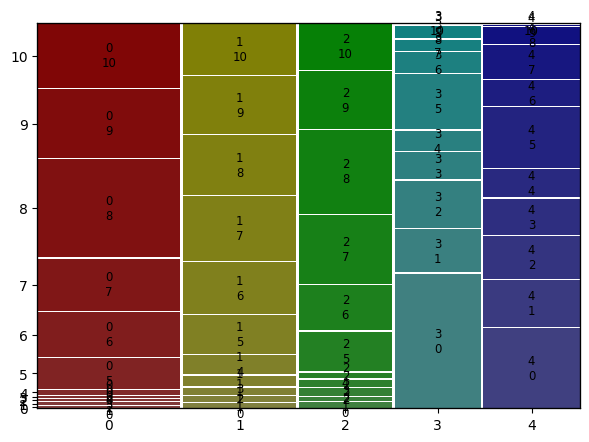

In [146]:
#MOSAIC PLOT
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

In [145]:
#Mosaic plot gender vs segment
crosstab_gender =pd.crosstab(df['cluster_num'],df['Gender'])
crosstab_gender

Gender,0,1
cluster_num,,
0,236,155
1,180,129
2,121,133
3,97,138
4,154,110


Represents ratio of Male and Female in every cluster

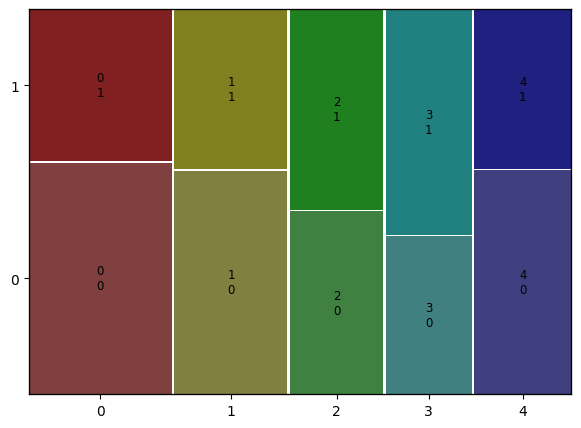

In [138]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
plt.show()

<Axes: xlabel='cluster_num', ylabel='Age'>

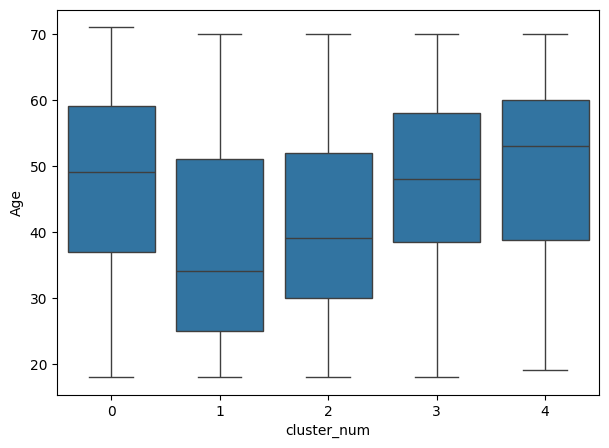

In [131]:
#box plot for age

sns.boxplot(x="cluster_num", y="Age", data=df)

In [132]:
# Selecting target segment

#Calculating the mean
#Visit frequency
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.562660
1,1,2.653722
2,2,2.570866
3,3,2.697872
4,4,2.742424


In [133]:
#Like
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,7.703325
1,1,6.983819
2,2,7.169291
3,3,2.365957
4,4,3.208333


In [128]:
#Gender
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.396419
1,1,0.417476
2,2,0.523622
3,3,0.587234
4,4,0.416667


In [134]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.396419,7.703325,2.562660
1,1,0.417476,6.983819,2.653722
2,2,0.523622,7.169291,2.570866
3,3,0.587234,2.365957,2.697872
4,4,0.416667,3.208333,2.742424


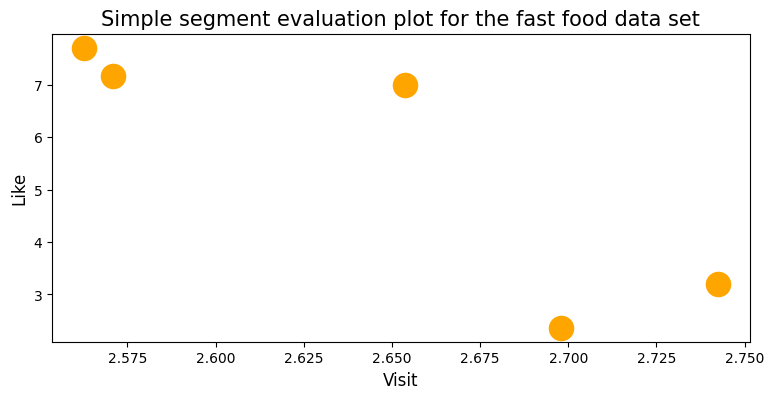

In [135]:
#Target segments

plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="orange")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()